In [206]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [207]:
# Read the excel file
df_2021 = pd.read_excel("data/donnees-effectifs-polices-municipales-2021.xlsx", sheet_name="II)_Communes")

In [208]:
datas_extract = df_2021.iloc[4:]
datas_extract

,MI/SG/DLPAJ/SDPA/BPA/2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
4,Numéro département,Nom département,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nombre de maîtres chiens de police municipale,Nombre de chiens de patrouille de police munic...,Nombre de communes ou EPCI doté(e)s d’une brig...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TOTAL NATIONAL,NaN,NaN,4452,51538471,369,25466,8067.5,679,462,456,232
7,NaN,Ain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,NaN,1.0,Ambérieu en Bugey,14586,1,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4724,988,NaN,1.0,MONT-DORE,27620,0,20,2,15,2,1,1
4725,988,NaN,1.0,DUMBEA,36800,0,34,0,4,2,2,1
4726,988,NaN,1.0,PAITA,24568,0,1,7,9,2,2,1
4727,TOTAL NOUVELLE-CALÉDONIE,NaN,NaN,4,183273,0,208,9,28,18,19,4


In [209]:
# Get columns names
columns = datas_extract.iloc[0].values
columns[3] = "Nom des communes ou EPCI ayant un service de police municipale"
columns[4] = "Nombre d’habitants de la commune"
columns[5] = "Mise en commun d'agents de police municipale entre communes"
columns[6] = "Nombre d’agents de police municipale"
columns[7] = "Nombre d’ASVP (à Paris, nombre d’ASP et contrôleurs)"
columns[8] = "Nombre de gardes-champêtres"
#columns[8] = ""
columns

array(['Numéro département', 'Nom département', nan,
       'Nom des communes ou EPCI ayant un service de police municipale',
       'Nombre d’habitants de la commune',
       "Mise en commun d'agents de police municipale entre communes",
       'Nombre d’agents de police municipale',
       'Nombre d’ASVP (à Paris, nombre d’ASP et contrôleurs)',
       'Nombre de gardes-champêtres',
       'Nombre de maîtres chiens de police municipale',
       'Nombre de chiens de patrouille de police municipale',
       'Nombre de communes ou EPCI doté(e)s d’une brigade canine'],
      dtype=object)

In [210]:
# Get rows
rows = datas_extract.iloc[2:].values
rows

array([['TOTAL NATIONAL', nan, nan, ..., 462, 456, 232],
       [nan, 'Ain', nan, ..., nan, nan, nan],
       [1, nan, 1.0, ..., 0, 0, '0'],
       ...,
       [988, nan, 1.0, ..., 2, 2, '1'],
       ['TOTAL NOUVELLE-CALÉDONIE', nan, nan, ..., 18, 19, 4],
       ['TOTAL NATIONAL', nan, nan, ..., 462, 456, 232]], dtype=object)

In [211]:
# Create new DataFrame
datas_clean = pd.DataFrame(rows, columns=columns)
datas_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Numéro département                                              4620 non-null   object
 1   Nom département                                                 104 non-null    object
 2   nan                                                             4452 non-null   object
 3   Nom des communes ou EPCI ayant un service de police municipale  4619 non-null   object
 4   Nombre d’habitants de la commune                                4618 non-null   object
 5   Mise en commun d'agents de police municipale entre communes     4619 non-null   object
 6   Nombre d’agents de police municipale                            4619 non-null   object
 7   Nombre d’ASVP (à Paris, nombre d’ASP et contrôleurs)        

In [212]:
# Datas per departments and national
national_row = datas_clean.loc[4722]

dict_totaux = {};
dept = '1'
for key, row in datas_clean.iterrows():
    if type(row['Numéro département']) == str:
        if 'TOTAL' in row['Numéro département']:
            dict_totaux[row['Numéro département']] = row
            dict_totaux[row['Numéro département']]['dept'] = dept
    else:
        dept=row['Numéro département']

print(dict_totaux['TOTAL CORSE-DU-SUD'])

#df_totaux = pd.DataFrame.from_dict(dict_totaux);
#print(df_totaux)

Numéro département                                                TOTAL CORSE-DU-SUD
Nom département                                                                  NaN
NaN                                                                              NaN
Nom des communes ou EPCI ayant un service de police municipale                     5
Nombre d’habitants de la commune                                              188739
Mise en commun d'agents de police municipale entre communes                        0
Nombre d’agents de police municipale                                              55
Nombre d’ASVP (à Paris, nombre d’ASP et contrôleurs)                              11
Nombre de gardes-champêtres                                                        2
Nombre de maîtres chiens de police municipale                                      0
Nombre de chiens de patrouille de police municipale                                0
Nombre de communes ou EPCI doté(e)s d’une brigade canine         

In [213]:
# Création d'un dictionnaire des départements par région
dict_region = {"auvergne_rhone_alpes" : ['1', '3', '7', '15', '26', '38', '42', '43', '63','69', '73', '74'],
"bourgogne_franche_comte" : ['21', '25', '39', '58', '70', '71', '89', '90'],
"bretagne" : ['22', '29', '35', '56'],
"centre_val_de_loire" : ['18', '28', '36', '37', '41', '45'],
"corse" : ['2B', '2A'],
"grand_est" : ['8', '10', '51', '52', '54', '55', '57', '88'],
"hauts_de_france" : ['2', '59', '60', '62', '80'],
"ile_de_france" : ['75', '77', '78', '91', '92', '93', '94', '95'],
"normandie" : ['14', '27', '50', '61', '76'],
"nouvelle_aquitaine" : ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
"occitanie" : ['9', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
"pays_de_la_loire" : ['44', '49', '53', '72', '85'],
"provence_alpes_cote_azur" : ['4', '5', '6', '13', '83', '84'],
"dom_tom": ['971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']
}

In [214]:
# Récupération des données de crimes par région pour 2021
dict_total_region = {}
for key, value in dict_totaux.items():
    dept = dict_totaux[key]['dept']
    dict_total_region[dept] = 0
    for dep in value:
        total = dict_totaux[key]["Nombre d’agents de police municipale"]
        dict_total_region[dept] = total
        
# dict_region
dict_total_region

dict_police_per_region = {}
for key, value in dict_region.items():
    dict_police_per_region[key] = 0
    for dep in value:
        for dept, eff_police in dict_total_region.items():
            if(str(dept) == str(dep)):
                dict_police_per_region[key] += eff_police
            if(str(dept) == '2A' or str(dept) == '2B'):
                dict_police_per_region['corse'] += eff_police
            #dict_police_per_region[key] = 

dict_police_per_region
# dictionnaire des données de chaque département ordonnées
dict_sum_total_dep = {k: v for k, v in sorted(dict_police_per_region.items(), key=lambda item: item[1], reverse=True)}
dict_sum_total_dep


{'provence_alpes_cote_azur': 4545,
 'ile_de_france': 4373,
 'occitanie': 3343,
 'auvergne_rhone_alpes': 2827,
 'hauts_de_france': 1880,
 'dom_tom': 1845,
 'nouvelle_aquitaine': 1560,
 'grand_est': 1014,
 'centre_val_de_loire': 850,
 'normandie': 806,
 'pays_de_la_loire': 692,
 'bourgogne_franche_comte': 573,
 'bretagne': 562,
 'corse': 0}

In [220]:
# récuperer les tops premiers départements de crimes
top = 5
dict_top = dict(list(dict_sum_total_dep.items())[0:top])
dict_other = sum(dict(list(dict_sum_total_dep.items())[top:]).values())
dict_top['Autres départements'] = dict_other

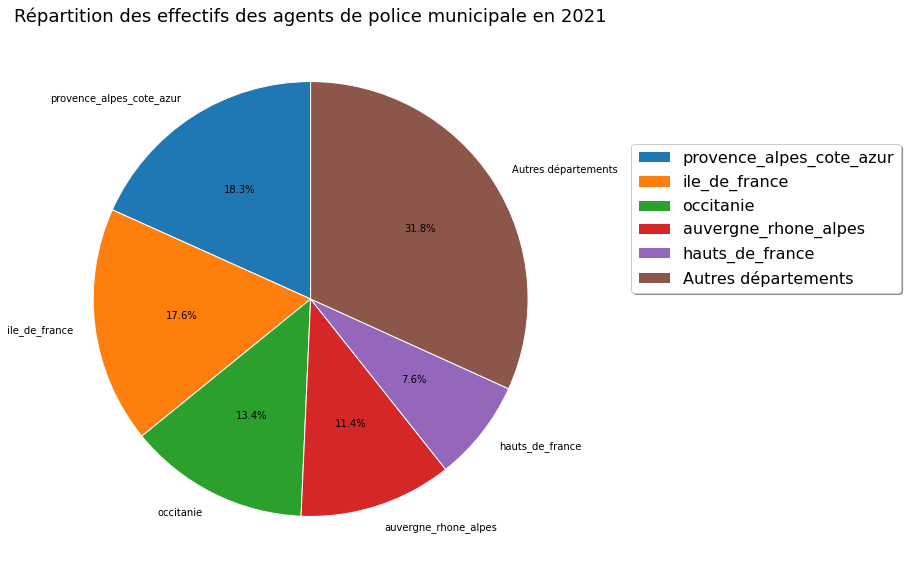

In [226]:
# Create a pieplot
plt.pie(dict_top.values(), labels=dict_top.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1.6, 0.8), shadow=True, ncol=1, fontsize=16)
plt.title("Répartition des effectifs des agents de police municipale en 2021", fontsize=18)
plt.show()